 # PROBLEM STATEMENT 

In [19]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import datetime as dt
from scipy.stats import chi2
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [20]:
df = pd.read_csv('yulu_data.csv')#  reading the dataset

In [21]:
df.head(15) # top 15 rows using head

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-Jan-11,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,01-Jan-11,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,01-Jan-11,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,01-Jan-11,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,01-Jan-11,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,01-Jan-11,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,01-Jan-11,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,01-Jan-11,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,01-Jan-11,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,01-Jan-11,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [22]:
df.info() # info - datatype and nullvalues 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Dataset is clean, There are no Null Values.

In [23]:
df.shape # shape of the dataset

(10886, 12)

In [24]:
df.describe() # summary of dataset

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


the total count columsn has an mean of 191 with a high std of 181 with min being 1 and max being 977 on a given day

In [25]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')# convert to datatime format

In [26]:
df['day'] = df['datetime'].dt.day # taking the day column

df['month'] = df['datetime'].dt.month # taking the month column

df['hour'] = df['datetime'].dt.hour # taking the hour column

df['year'] = df['datetime'].dt.year # taking the year column

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,0,2011
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,0,2011
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,0,2011
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,0,2011


In [28]:
day_df = df.groupby([df['day'],df['month'],df['year']])['count'].sum() # grouping per day, month and year
day_df = day_df.reset_index()

In [29]:
day_df

,day,month,year,count
0,1,1,2011,985
1,1,1,2012,2294
2,1,2,2011,1360
3,1,2,2012,4579
4,1,3,2011,1851
...,...,...,...,...
451,19,10,2012,5424
452,19,11,2011,3663
453,19,11,2012,5499
454,19,12,2011,3403


In [30]:
df['day'].unique() # day Unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

we have data for 2 years they are 2011 and 2012
we have data for 12 month and 19 days for each month


In [31]:
column_list=list(df.columns) # list of columns
column_list

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'day',
 'month',
 'hour',
 'year']

In [32]:
col_len=len(column_list) # number of columns

In [33]:
# columns and each unique values
tot=[]
for i in range(col_len):
    tot.append(df[column_list[i]].nunique())
x=zip(column_list,tot)
for k,v in x:
    print(k+' : '+ str(v))

datetime : 456
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822
day : 19
month : 12
hour : 1
year : 2


we can see that season holiday and weather has less unique values, so we can change them into categorical columns

In [34]:
for i in range(len(tot)): # lets convert category values with less than 5 unique int values
    if tot[i]<5:
        df[column_list[i]]=df[column_list[i]].astype('category')

In [35]:
df.info() # new category columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  category      
 15  year        10886 non-null  category      
dtypes: category(6), dateti

In [36]:
df[['temp','atemp']].agg([min,max])

,temp,atemp
min,0.82,0.760
max,41.00,45.455


In [37]:
(df['atemp']-df['temp']).describe() # change in orginal and feeling temp summary

count    10886.000000
mean         3.424224
std          1.566612
min        -23.140000
25%          2.745000
50%          3.680000
75%          4.055000
max          8.045000
dtype: float64

There is no much difference between temp and atemp around 3.6 degrees.

In [38]:
df[['humidity','windspeed']].agg([min,max]) # min-max range of the speed and humdity factors

,humidity,windspeed
min,0,0.0000
max,100,56.9969


In [39]:
df['wind_cat']=pd.cut(df['windspeed'],bins=[-1,0,3,7,12,18,24,31,38,46,54,63],labels=['Calm','Light air','Light breeze','Gentle breeze','Moderate breeze','Fresh breeze','Strong breeze','Moderate gale','Fresh gale','Strong gale','Whole gale'])
# using wind categories

<Axes: xlabel='wind_cat', ylabel='count'>

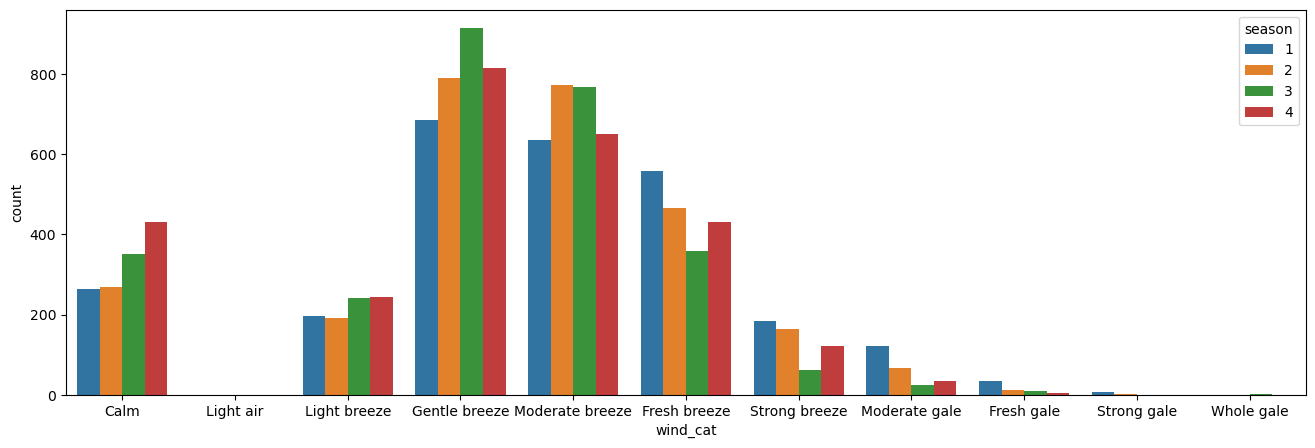

In [40]:
plt.figure(figsize=(16,5)) # univariate count plot analsyis
sns.countplot(x=df['wind_cat'],hue=df['season'])

Wind speed for [0-3] mph is not present, and we can observe that data is right skewed because very few people travel during high wind speeds and most number of people travel during moderate wind speeds. From above plot we can say that-- on days which has wind speed less than 24mph people travels more.

<Axes: >

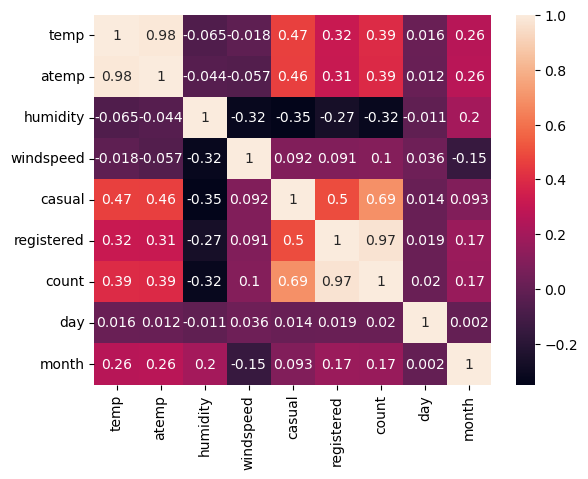

In [41]:
sns.heatmap(data=df.corr(),annot=True) # correlation heatmap

There is no significant insights from the heatmap

<Axes: xlabel='holiday', ylabel='count'>

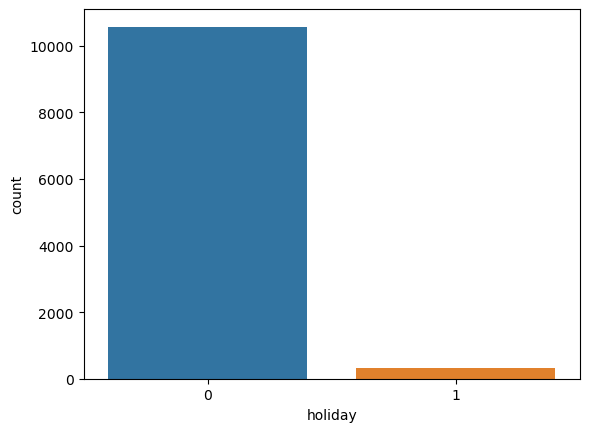

In [42]:
sns.countplot(x=df['holiday']) # countplot for holiday

In [43]:
df['holiday'].value_counts() # value counts for holiday

0    10575
1      311
Name: holiday, dtype: int64

from above we can say that most number of the rides were taken place on the non-holiday days considering 0 as not a holiday and 
1 as a holiday

In [44]:
x=df['holiday'].value_counts() # index values
x.index

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')

<Axes: xlabel='workingday', ylabel='count'>

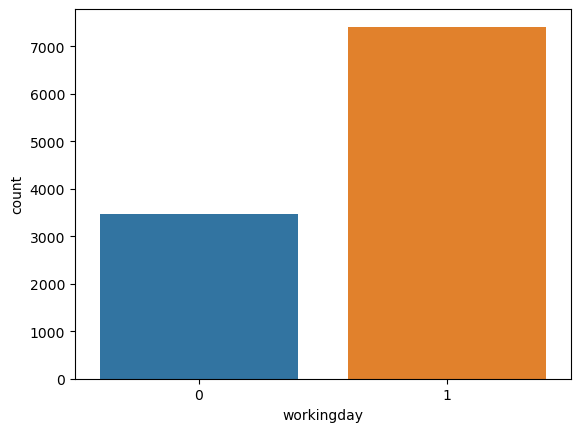

In [45]:
sns.countplot(x=df['workingday']) # working day countplot


from above plots we can see that most of the rides are on working days compared to the holiday

<Axes: xlabel='count', ylabel='season'>

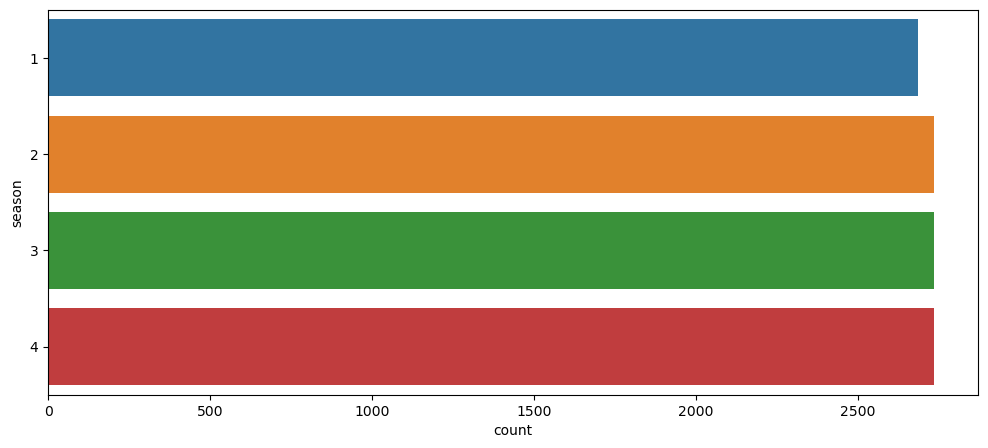

In [46]:
plt.figure(figsize=(12,5)) # season countplot
sns.countplot(y=df['season'])

In [47]:
df.season.value_counts() # season value_counts

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

From above we can say that we have equal amount of data from all sesons

<Axes: xlabel='weather', ylabel='count'>

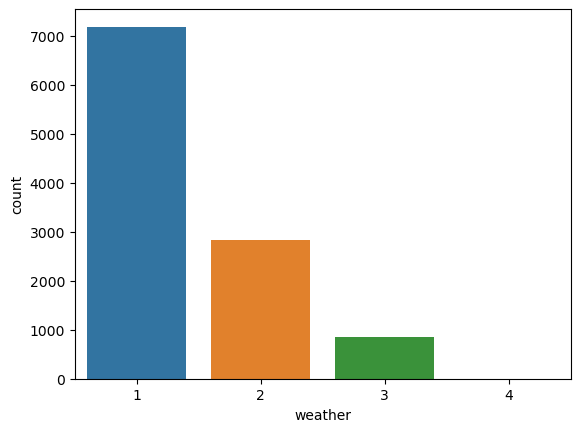

In [48]:
sns.countplot(x=df['weather']) # weather countplots

1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Most of the people use yulu during when the weather condition is Clear, Few clouds, partly cloudy, partly cloudy

<Axes: >

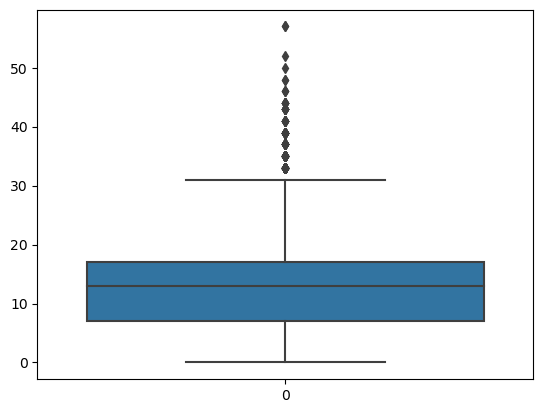

In [49]:
sns.boxplot(df['windspeed']) # boxplot for windspeed

There are more outliers in the wind speed

<Axes: >

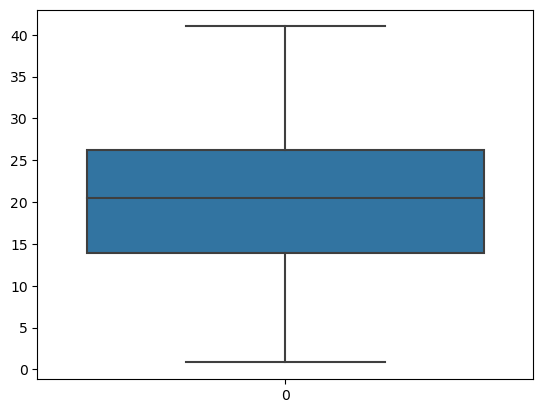

In [50]:
sns.boxplot(df['temp']) # temp boxplot

No outliers in Temperature 

In [51]:
df['weather'].value_counts() # weather value_counts

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<Axes: >

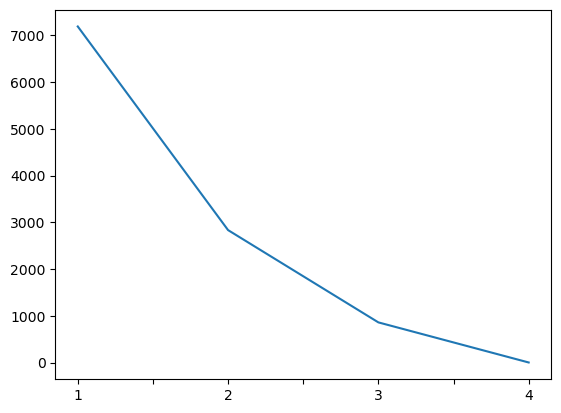

In [52]:
df['weather'].value_counts().plot() # plotiing weather counts

There is only one row data availale for weather type 4 we can consider it as an outlier

In [53]:
x=pd.DataFrame(df.groupby(['weather'])['count'].sum())
x=x.reset_index()
x

,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


There are more number of rides taken place in weather condition 1 compared to other weathers. 

<Axes: xlabel='weather', ylabel='count'>

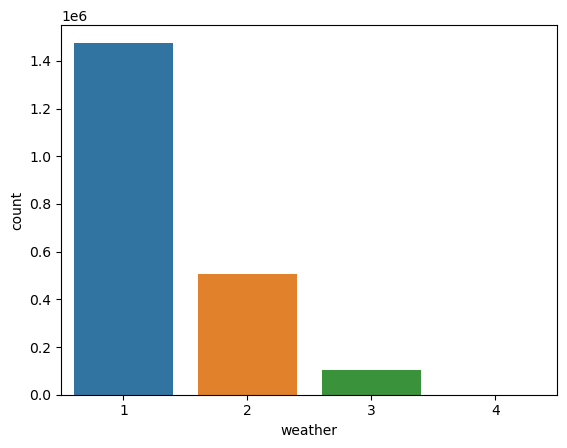

In [54]:
sns.barplot(x=x['weather'],y=x['count']) # barplot if weather vs count

<Axes: xlabel='weather', ylabel='count'>

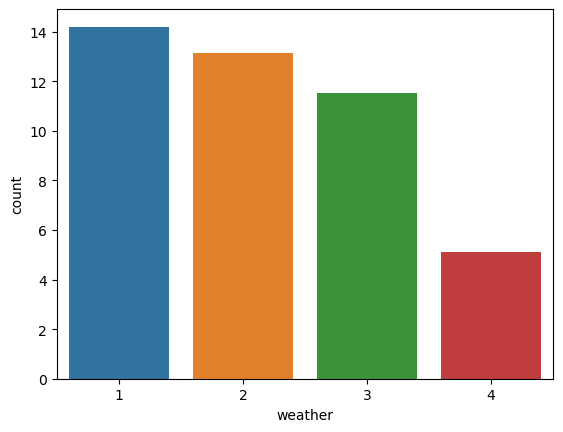

In [55]:
sns.barplot(x=x['weather'],y=np.log(x['count'])) # weather and count

In [56]:
x=pd.DataFrame(df.groupby(df['workingday'])['count'].sum()) # working day and count
x=x.reset_index()
x

,workingday,count
0,0,654872
1,1,1430604


<Axes: xlabel='workingday', ylabel='count'>

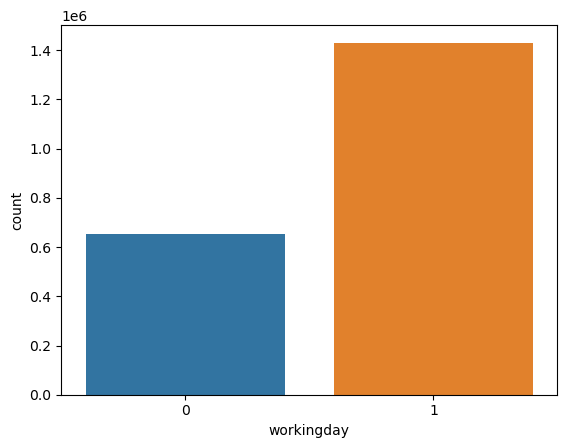

In [57]:
sns.barplot(x=x['workingday'],y=x['count']) # barplot working day  and count

More number of rides were taken place on working days compared to non working days considering 1 as working day and 
0 as non working day

In [58]:
x=pd.DataFrame(df.groupby(df['season'])['count'].sum()) # groupby season and count
x=x.reset_index()
x

,season,count
0,1,312498
1,2,588282
2,3,640662
3,4,544034


In [59]:
x=pd.DataFrame(df.groupby(df['holiday'])['count'].sum())
x=x.reset_index()
x

,holiday,count
0,0,2027668
1,1,57808


<Axes: xlabel='holiday', ylabel='count'>

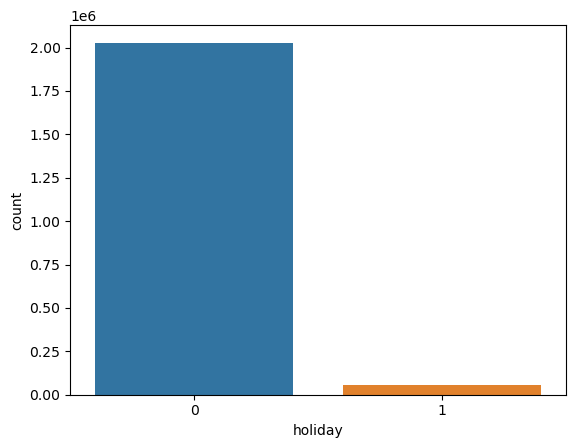

In [60]:
sns.barplot(x=x['holiday'],y=x['count']) # barplot of holiday vs count

<Axes: xlabel='holiday', ylabel='count'>

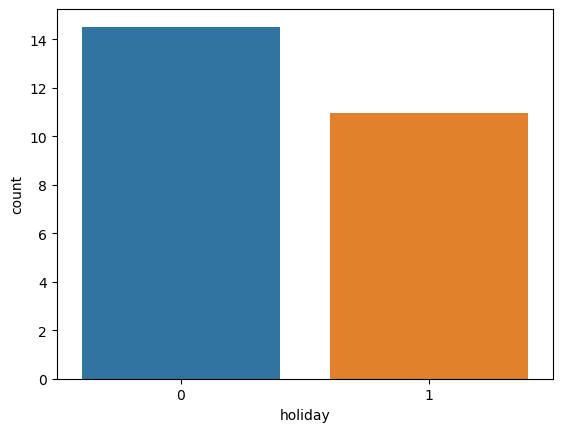

In [61]:
sns.barplot(x=x['holiday'],y=np.log(x['count'])) # barplot of holiday vs count

Less number of rides were happened on holidays, we can infer that most of the people use Yulu to commute to workplaces.

In [62]:
x=pd.DataFrame(df.groupby(df['wind_cat'])['count'].sum()) # group by wincat vs count
x=x.reset_index()
x

,wind_cat,count
0,Calm,211526
1,Light air,0
2,Light breeze,128938
3,Gentle breeze,586141
4,Moderate breeze,590389
5,Fresh breeze,387342
6,Strong breeze,118882
7,Moderate gale,51007
8,Fresh gale,10053
9,Strong gale,659


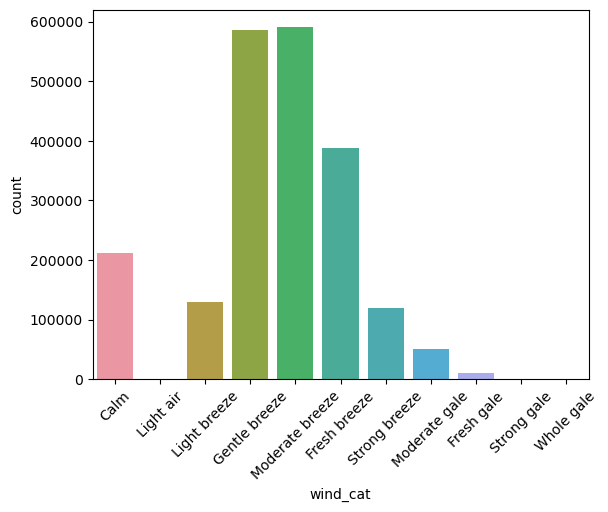

In [63]:
g=sns.barplot(x=x['wind_cat'],y=x['count']) # barplot of windcat vs count
g.set_xticklabels(labels = x['wind_cat'], rotation = 45)
plt.show()

Most of the rides takes place when there is Gentle,Moderate and fresh breeze.
Users prefer Yulu when the climate is clear

##### Working Day has effect on number of electric cycles rented

In [64]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year,wind_cat
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011,Calm
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,0,2011,Calm
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,0,2011,Calm
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,0,2011,Calm
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,0,2011,Calm


In [65]:
df['datetime'] = df['datetime'].astype('datetime64[ns]') # datetime dtatype

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  category      
 15  year        10886 non-null  category      
 16  wind_cat    10886 non-

In [67]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,year,wind_cat
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,2011,Calm
1,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,0,2011,Calm
2,2011-01-01,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,0,2011,Calm
3,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,0,2011,Calm
4,2011-01-01,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,0,2011,Calm


In [68]:
# day month, year from datetime column

df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['year'] = df['datetime'].dt.year

In [69]:
x=pd.DataFrame(df.groupby([df['month'],df['year']])['count'].sum())
x=x.reset_index()
x

,month,year,count
0,1,2011,23552
1,1,2012,56332
2,2,2011,32844
3,2,2012,66269
4,3,2011,38735
5,3,2012,94766
6,4,2011,50517
7,4,2012,116885
8,5,2011,79713
9,5,2012,120434


<Axes: xlabel='month', ylabel='count'>

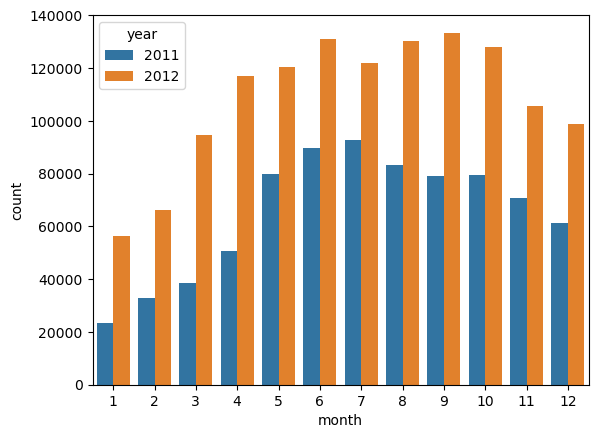

In [70]:
sns.barplot(x=x['month'],y=x['count'],hue=x['year']) # barplot of count vs year

There is a potential increase of rides from 2011 to 2012 in every month.

In [71]:
x=pd.DataFrame(df.groupby(df['year'])['count'].sum())
x=x.reset_index()
x

,year,count
0,2011,781979
1,2012,1303497


number of rides in 2012 are increased compared to 2011 

In [72]:
df.loc[df['workingday'] == 0].groupby([df['day'],df['month'],df['year']])['count'].sum()

day  month  year
1    1      2011     985
            2012    2294
     4      2012    6041
     5      2011    3351
     7      2012    5531
                    ... 
19   3      2011    3117
     5      2012    8294
     6      2011    4744
     8      2012    4549
     11     2011    3663
Name: count, Length: 145, dtype: int64

### Working Day has effect on number of electric cycles rented -- 2- Sample T-Test

Lets groupby the data by number of rides per each day and split them into working and not working days.

In [73]:
count_not_working= pd.DataFrame(df.loc[df['workingday']==0].groupby([df['day'],df['month'],df['year']])['count'].sum())
count_not_working.shape

(145, 1)

In [74]:
count_not_working=count_not_working.reset_index()
count_not_working=count_not_working.sort_values(by='count')

In [75]:
count_not_working

,day,month,year,count
42,6,3,2011,605
116,16,4,2011,795
8,2,1,2011,801
62,9,1,2011,822
53,8,1,2011,959
...,...,...,...,...
45,6,10,2012,7965
11,2,6,2012,8120
66,9,9,2012,8227
141,19,5,2012,8294


<Axes: xlabel='count', ylabel='Count'>

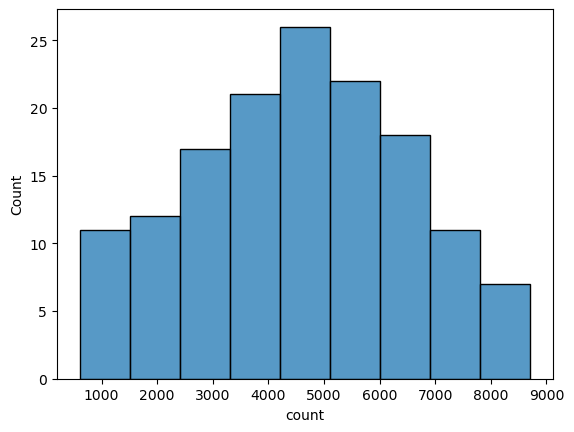

In [76]:
sns.histplot(count_not_working['count']) #histplot of count

Above we can see that data is normal and we are good to perform ttest on the data

In [77]:
count_working = pd.DataFrame(df.loc[df['workingday']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [78]:
count_working.head()

count
day month year       
1   2     2011   1360
          2012   4579
    3     2011   1851
          2012   4990
    4     2011   2227

In [79]:
count_working.shape

(311, 1)

In [80]:
count_working=count_working.reset_index()

In [81]:
count_working.sort_values(by='count')

,day,month,year,count
151,10,3,2011,623
277,18,1,2011,683
113,7,12,2011,705
179,12,1,2011,1162
163,11,1,2011,1263
...,...,...,...,...
175,11,9,2012,7767
208,13,9,2012,7804
190,12,9,2012,7870
225,14,9,2012,8009


<Axes: xlabel='count', ylabel='Count'>

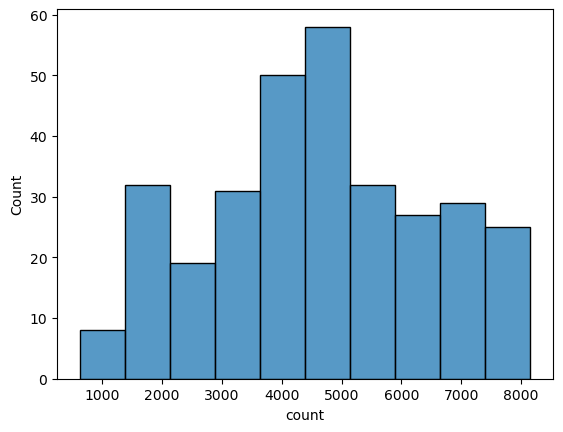

In [82]:
sns.histplot(count_working['count'])

This is almost similar to the normal distribution, lets make kstest to get clear idea about the means.

In [83]:
stat.kstest(count_not_working['count'],count_working['count'],'norm') # ks test

KstestResult(statistic=0.06466348819159552, pvalue=0.771068979647964, statistic_location=3820, statistic_sign=1)

we assume here the alpha as 0.05 and the pvalue > alpha , we can consider these two samples to perform ttest

# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [84]:
stat.ttest_ind(count_working['count'].sample(80),count_not_working['count'].sample(80)) # 2 t  test 

Ttest_indResult(statistic=1.3476869964990685, pvalue=0.17968832329618065)

Null Hypothesis : There is no effect of working days and non working days
Alternative Hypothesis : There is an effect of working days and non working days

alpha = 0.05
P value = 0.12

Since pvalue > alpha, it is failed to reject the null hypothesis, we can infer that there is no effect of
working day on the number of rides made per day.

In [85]:
df['season'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [86]:
season_1=pd.DataFrame(df.loc[df['season']==1].groupby([df['day'],df['month'],df['year']])['count'].sum())

In [87]:
season_1=season_1.reset_index()
season_1=season_1.sort_values(by='count')

In [88]:
season_1

,day,month,year,count
34,6,3,2011,605
58,10,3,2011,623
102,18,1,2011,683
6,2,1,2011,801
48,9,1,2011,822
...,...,...,...,...
107,18,3,2012,5892
113,19,3,2012,6153
89,15,3,2012,6192
83,14,3,2012,6312


In [89]:
season_2= pd.DataFrame(df.loc[df['season']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_2=season_2.sort_values(by='count')
season_2

,day,month,year,count
90,16,4,2011,795
42,8,4,2011,1471
24,5,4,2011,1795
66,12,4,2011,2034
72,13,4,2011,2162
...,...,...,...,...
89,15,6,2012,7665
95,16,6,2012,7702
47,8,6,2012,7736
11,2,6,2012,8120


In [90]:
season_3= pd.DataFrame(df.loc[df['season']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_3=season_3.sort_values(by='count')
season_3

,day,month,year,count
46,8,9,2011,1842
40,7,9,2011,1996
34,6,9,2011,2710
28,5,9,2011,3351
52,9,9,2011,3544
...,...,...,...,...
105,18,8,2012,7865
71,12,9,2012,7870
83,14,9,2012,8009
53,9,9,2012,8227


In [91]:
season_4= pd.DataFrame(df.loc[df['season']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
season_4=season_4.sort_values(by='count')
season_4

,day,month,year,count
40,7,12,2011,705
92,16,11,2011,1817
66,12,10,2011,2416
108,19,10,2011,2424
0,1,10,2011,2429
...,...,...,...,...
61,11,10,2012,7570
13,3,10,2012,7572
55,10,10,2012,7691
31,6,10,2012,7965


In [92]:
np.var(season_1['count'])

2107165.9556786707

In [93]:
np.var(season_2['count'])

2811640.8291782085

In [94]:
np.var(season_3['count'])

2036263.220683286

In [95]:
np.var(season_4['count'])

2147031.649738381

(array([14., 32., 20., 17., 14.,  8.,  3.,  5.,  0.,  1.]),
 array([ 605. , 1328.1, 2051.2, 2774.3, 3497.4, 4220.5, 4943.6, 5666.7,
        6389.8, 7112.9, 7836. ]),
 <BarContainer object of 10 artists>)

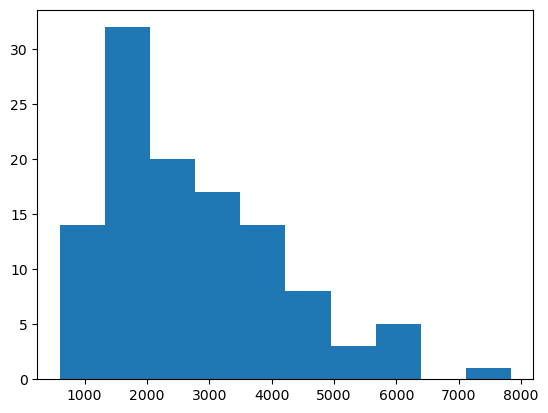

In [96]:
plt.hist(season_1['count'])

(array([ 1.,  1., 10., 18., 18., 20., 25.,  8.,  5.,  8.]),
 array([ 705. , 1450.1, 2195.2, 2940.3, 3685.4, 4430.5, 5175.6, 5920.7,
        6665.8, 7410.9, 8156. ]),
 <BarContainer object of 10 artists>)

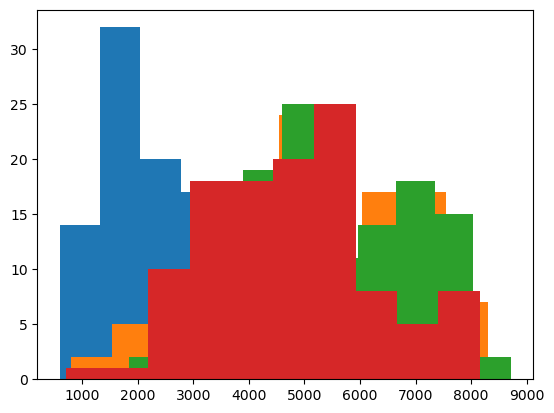

In [97]:
plt.hist(season_1['count'])
plt.hist(season_2['count'])
plt.hist(season_3['count'])
plt.hist(season_4['count'])

The samples are not normally distributed so we will test with levene's as it is performed for 

In [98]:
stat.levene(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

LeveneResult(statistic=1.5071252673249398, pvalue=0.21194448921499898)

# ANOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season (10 points)

In [99]:
stat.f_oneway(season_1['count'],season_2['count'],season_3['count'],season_4['count'])

F_onewayResult(statistic=80.0504789788067, pvalue=1.506580502991204e-41)

#### No. of cycles rented similar or different in different weather -- ANOVA

In [100]:
df['weather'].unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [101]:
weather_1=pd.DataFrame(df.loc[df['weather']==1].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_1=weather_1.sort_values(by='count')
weather_1

,day,month,year,count
305,14,5,2012,2
226,11,1,2011,15
281,13,5,2011,20
186,9,3,2011,20
348,16,3,2011,27
...,...,...,...,...
267,12,9,2012,7870
34,2,6,2012,7881
197,9,9,2012,8103
111,5,10,2012,8156


In [102]:
weather_2=pd.DataFrame(df.loc[df['weather']==2].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_2=weather_2.sort_values(by='count')
weather_2

,day,month,year,count
114,7,2,2012,5
65,4,6,2012,5
101,6,7,2012,7
204,12,7,2011,8
278,16,7,2012,11
...,...,...,...,...
116,7,5,2012,5228
221,13,7,2012,5429
139,8,8,2012,5497
162,9,10,2012,6000


In [103]:
weather_3=pd.DataFrame(df.loc[df['weather']==3].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_3=weather_3.sort_values(by='count')
weather_3

,day,month,year,count
74,8,2,2011,1
42,4,8,2011,3
123,13,1,2012,3
63,7,1,2011,5
64,7,3,2011,6
...,...,...,...,...
68,7,9,2011,1591
185,19,10,2011,1803
15,1,10,2012,2043
25,2,9,2012,2139


In [104]:
weather_4=pd.DataFrame(df.loc[df['weather']==4].groupby([df['day'],df['month'],df['year']])['count'].sum()).reset_index()
weather_4=weather_4.sort_values(by='count')
weather_4

,day,month,year,count
0,9,1,2012,164


Removing the weather 4 as there is no much data in the weather 4 condition

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([12.30624847, 12.40624847, 12.50624847, 12.60624847, 12.70624847,
        12.80624847, 12.90624847, 13.00624847, 13.10624847, 13.20624847,
        13.30624847]),
 <BarContainer object of 10 artists>)

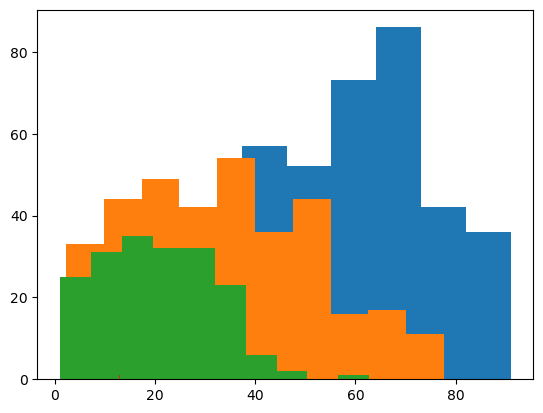

In [105]:
plt.hist(np.sqrt(weather_1['count']))
plt.hist(np.sqrt(weather_2['count']))
plt.hist(np.sqrt(weather_3['count']))
plt.hist(np.sqrt(weather_4['count']))


The data is not normally distributed so we need to perform levene's test.

In [106]:
stat.levene(np.sqrt(weather_1['count']),np.sqrt(weather_2['count']),np.sqrt(weather_3['count']))

LeveneResult(statistic=33.64696582500653, pvalue=7.495205135432121e-15)

In [107]:
stat.f_oneway(weather_1['count'],weather_2['count'],weather_3['count'])

F_onewayResult(statistic=244.75558358157312, pvalue=1.0951526874746051e-86)

# Chi-square test to check if Weather is dependent on the season (10 points)

In [118]:
#Contigency Table
contingency_table = pd.crosstab(df['weather'],df['season'])
print("contingency_table :-\n", contingency_table)

TypeError: 'int' object is not subscriptable

In [117]:
# Observed Values
Observed_Values = contingency_table.values
print('observed_Values -:\n', observed_Values)

NameError: name 'observed_Values' is not defined

In [110]:
b=stat.chi2_contingency(contingency_table)
Expected_Values = b[3]
print('Expected_values -:\n', Expected_Values)

Expected_values -:
 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]


In [111]:
# Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:4,0])
no_of_columns=len(contingency_table.iloc[0,0:4])
df=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom', df)

Degree of Freedom 9


In [112]:
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:   ",chi_square_statistic)

chi-square statistic:    3.3970813914527893


In [113]:
# Critical Values
critical_value=chi2.ppf(q=1-0.05,df=df)
print('critical_value', critical_value)

critical_value 16.918977604620448


In [114]:
# P_value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value', p_value)

p-value 0.9464543759349711


In [115]:
print('Significance level: 0.05')
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level: 0.05
Degree of Freedom:  9
chi-square statistic: 3.3970813914527893
critical_value: 16.918977604620448
p-value: 0.9464543759349711


In [116]:
if p_value<=0.05:
    print("Reject H0,There is dependency on weather and season")
else:
    print("Retain H0,There is no dependency on weather and season")

Retain H0,There is no dependency on weather and season
